# Лабораторная работа 5

## Анимация качения треугольника Рело по квадрату

Булгаков А.Е., 19.05.2025

### Задание 5.1. Начальное положение треугольника Рело и квадрата

Изобразите в одной графической области треугольник Рело (сплошная линия красного
цвета), точку центра треугольника Рело (маркер черного цвета) и квадрат (сплошная
линия синего цвета), в который вписан треугольник Рело.

In [86]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo

import matplotlib.animation as anim
%matplotlib widget

In [88]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

Для построения матрицы relo_matrix координат точек-границ треугольника Рело
используем функцию regular_polygon_Relo(n, center, r, N) из модуля relo ,
созданного в Лабораторной работе 4

In [91]:
relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)

Длина стороны квадрата равна ширине треугольника Рело r , центр квадрата
располагаем в начале координат.


$\color{red}{Постройте}$ матрицу square для покоординатного описания границы
квадрата

In [95]:
square = np.array(([center-r/2,center-r/2],
                   [center-r/2,center+r/2],
                   [center+r/2,center+r/2],
                   [center+r/2,center-r/2],
                   [center-r/2,center-r/2]))
square

array([[[-5., -5.],
        [-5., -5.]],

       [[-5., -5.],
        [ 5.,  5.]],

       [[ 5.,  5.],
        [ 5.,  5.]],

       [[ 5.,  5.],
        [-5., -5.]],

       [[-5., -5.],
        [-5., -5.]]])

$\color{red}{Изобразите}$ в одной системе координат, треугольник Рело и
точку центра треугольника Рело.

(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

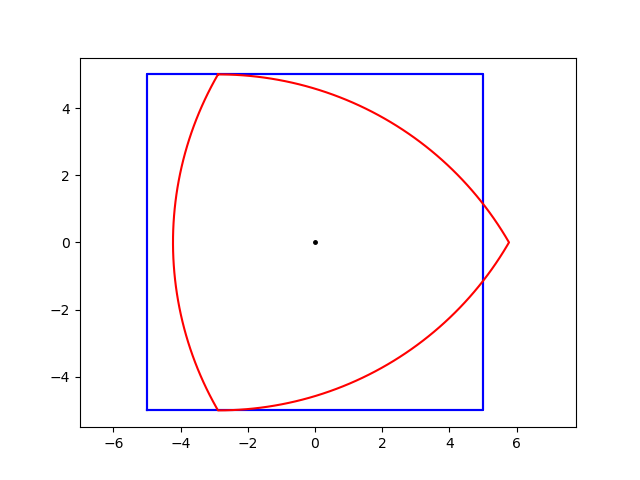

In [98]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

Треугольник Рело необходимо сдвинуть влево таким образом, чтобы он оказался
вписанным в квадрат. $\color{red}{Определите}$ величину вектора сдвига shift . $\color{red}{Поясните}$ в
тексте документа формулу для расчета вектора сдвига.

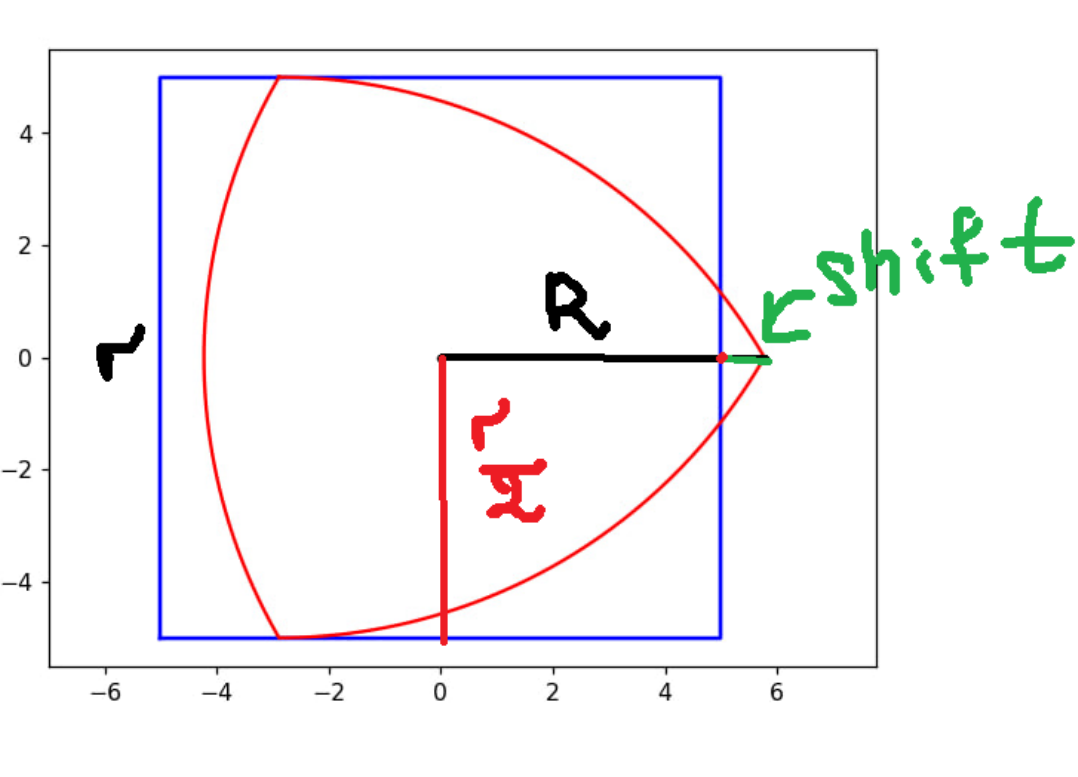

In [102]:
l = math.sqrt(r**2*2*(1-math.cos(math.pi/n)))
R = l/(2*math.sin(math.pi/n))

Вершины правильного многоугольника расположены на окружности, описанной
вокруг многоугольника. Радиус $R$ окружности, описанной вокруг правильного $n$-
угольника с длиной стороны $l$, вычисляется по формуле

$$\textbf{R}=\frac {l}{2 \sin\pi/n},$$

 $$ l = \sqrt{2r^2\left(1-cos(\frac{\pi}{n})\right)} $$

In [105]:
shift = [R-r/2, 0]

In [107]:
relo_matrix_shifted = relo_matrix - shift
center -= shift

(-5.5, 5.500000000000003, -5.5, 5.500000000000001)

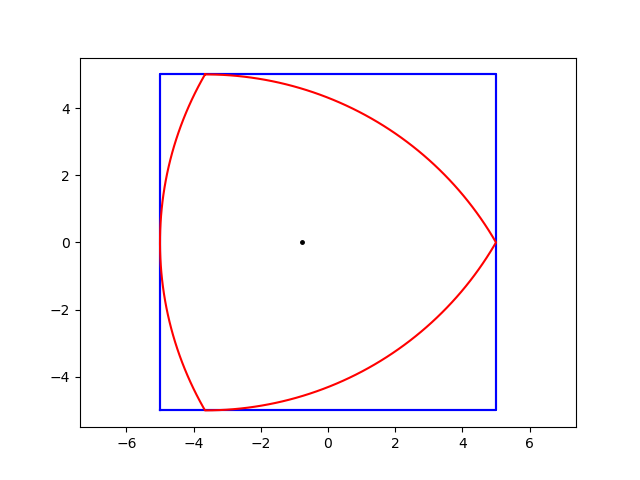

In [109]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

### Задание 5.2. Анимация поступательного движения треугольника Рело по окружности

Полагаем, что при качении треугольника Рело по квадрату против часовой стрелки
центр треугольника Рело совершает поступательное движение по окружности с
центром окружности в начале координат и радиусом, равным shift[0] , против
часовой стрелки.

Зададим количество кадров анимации N_frames , необходимое для поступательного
движения треугольника с полным обходом окружности

In [113]:
N_frames = 100

Создадим матрицу center_frame из N_frames строк и двух столбцов для описания
координат точек окружности, необходимой для реализации поступательного движения,
с центром в начале координат и радиусом shift[0] при обходе окружности против
часовой стрелки от $-\pi$ до $\pi$. В первом столбце матрицы расположены $x$-координаты
точек, во втором столбце $y$-координаты.

Подумайте, почему обход окружности осуществляется от $-\pi$ до $\pi$.

*Обход от $-\pi$ до $\pi$ позволяет нам охватить все возможные направления движения по окружности, начиная с левой стороны (против часовой стрелки) и заканчивая правой стороной (по часовой стрелке). Это делает описание движения более естественным и интуитивно понятным.*

In [116]:
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

Изобразим первый кадр анимации. Для этого в одной графической области
изображаем квадрат (сплошная линия синего цвета), вписанный треугольник Рело
(сплошная линия красного цвета), центр треугольника Рело (линия по точкам красного
цвета) и окружность, по которой будет двигаться центр треугольника Рело (пунктирная
линия черного цвета).

In [119]:
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]

(-5.5, 5.500000000000003, -5.5, 5.500000000000001)

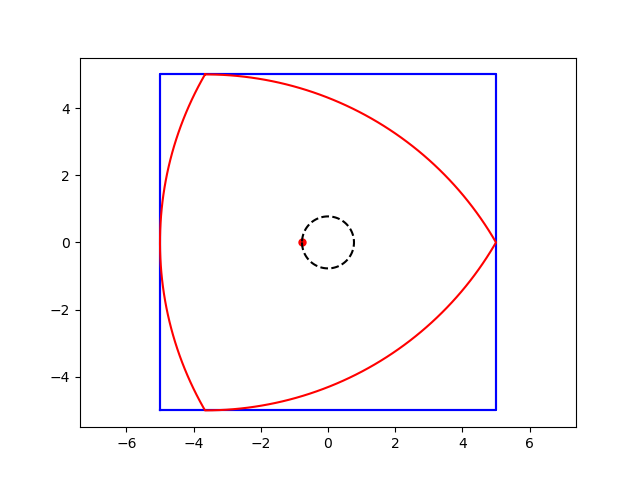

In [121]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

$\color{red}{Напишите \ пользовательскую \ функцию}$ трех аргументов draw_frame(r, N_frames, frame), которая изображает кадр с номером frame при поступательном движении центра треугольника Рело по окружности против часовой стрелки.
* Аргумент $r$ задает ширину треугольника Рело 
* Аргумент N_frames задает количества кадров для прохождения центром треугольника Рело полной окружности
* Аргумент frame задаёт номер кадра. По умолчанию frame = 0
* функция осуществляет визуализацию и не возвращает объекты

Для функции draw_frame $\color{red}{укажите}$ аннотации типов и $\color{red}{оформите}$
строки документации. *Переменные из глобальной области
видимости в теле функции использовать нельзя!*

In [124]:
def draw_frame(r: float = 3., N_frames: int = 100, frame: int = 0) -> None:
    """
    аргументы:
    r - ширина треугольника,
    N_frames - количество создаваемых кадров,
    frame - номер кадра (по умолчанию 0).
    
    функция отрисовывает кадры и возвращает передвигаемый объект
    """
    assert r>0 and (isinstance(r, float) or isinstance(r, int)), 'радиус r - положительное числом типа float или int'
    assert isinstance(N_frames, int) and N_frames > 0, 'количество создаваемых кадров N_frames должно быть типа int и больше 0'
    assert isinstance(frame, int) and frame >= 0, 'номер кадра frame должен быть числом типа int и быть больше или равным нулю'
    center = np.array([0.,0.])
    n = 3
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    l = math.sqrt(r**2*2*(1-math.cos(math.pi/n)))
    R = l/(2*math.sin(math.pi/n))
    shift = [R-r/2, 0]
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    square = np.array(([-r/2,-r/2],
                   [-r/2,r/2],
                   [r/2,r/2],
                   [r/2,-r/2],
                   [-r/2,-r/2]))
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

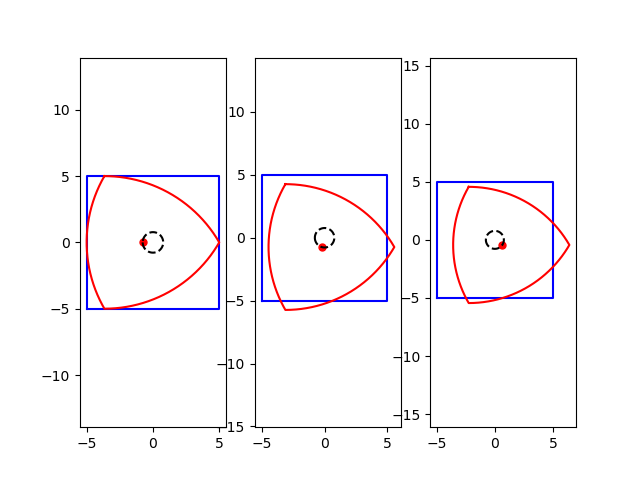

In [126]:
plt.figure()
N_frames = 100

plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)

plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)

plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

$\color {red}{Реализуйте \ анимацию}$ поступательного движения треугольника Рело. При построении анимации возьмите за основу функцию draw_frame, но не используйте её напрямую в качестве аргумента функции FuncAnimation (модуль animation библиотеки matplotlib).

In [129]:
def at_frame1(t) -> None:
    frame = t
    l = math.sqrt(r**2*2*(1-math.cos(math.pi/n)))
    R = l/(2*math.sin(math.pi/n))
    shift = [R-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[t]
    relo1.set_data(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1])
    point1.set_data([center_frame[t,0]], [center_frame[t,1]])

In [131]:
from matplotlib.animation import FuncAnimation

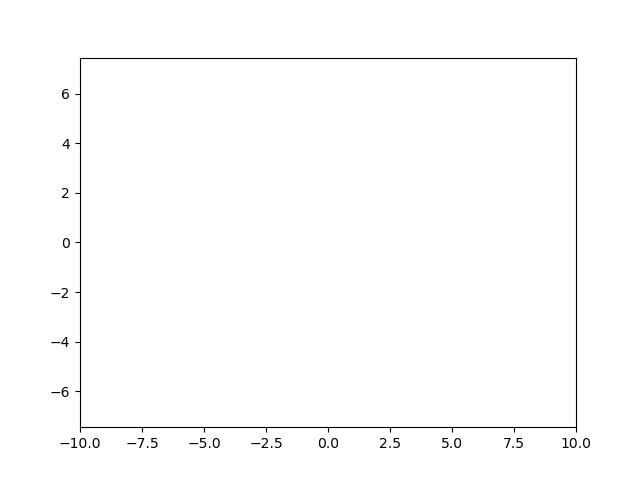

In [133]:
fig1 = plt.figure()
ax1 = plt.axes()
plt.axis('equal')
ax1.set(xlim=(-10, 10), ylim=(-10, 10))

    
def init():
    global relo1
    global point1
    global circle1
    global center_frame
    relo1, = ax1.plot([],[],'r-')
    point1, = ax1.plot(center_frame[0,0], center_frame[0,1], 'r.', markersize=10)
    circle1, = ax1.plot(center_frame[:,0], center_frame[:,1], 'k--')
    r = 10
    square = np.array(([-r/2,-r/2],[-r/2,r/2],[r/2,r/2],[r/2,-r/2],[-r/2,-r/2]))
    ax1.plot(square[:,0],square[:,1],'b-')
    
FuncAnimation(fig1, at_frame1, frames= 100, init_func=init, repeat=False, interval=30)

In [135]:
plt.close('all')

### Задание 5.3. Анимация качения треугольника Рело

Дополнительно к поступательному движению треугольника Рело против часовой
стрелки добавим вращательное движение по часовой стрелке на угол $\theta$. При этом
будем учитывать, что полный оборот центра треугольника на угол $2 \pi$ соответствует
вращению треугольника Рело на угол $2 \pi/3$.
Определим пользовательскую функцию rotate_matrix(theta) для создания
матрицы поворота по часовой стрелке на угол theta с применением синтаксиса
lambda -функций

In [139]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

Для поворота треугольника Рело на заданный угол необходимо матрицу поворота
умножить на каждую точку в представлении треугольника Рело relo_matrix `с
центром в начале координат`. Для умножения матрицы на вектор используем
функцию dot из расширения numpy.

Например, повернем треугольник Рело relo_matrix с центром в начале координат
на угол $\pi/3$ по часовой стрелке

In [142]:
theta = np.pi/3
matrix = rotate_matrix(theta)
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])

Изобразим в одной графической области исходный треугольник Рело (сплошная линия
красного цвета) и повернутый треугольник Рело (пунктирная линия зеленого цвета).
При этом выделим маркером первую точку в матричном представлении треугольника
Рело, чтобы проиллюстрировать эффект вращения по часовой стрелке на угол $\pi/3$.

(-6.3508529610858835, 6.350852961085886, -5.500000000000005, 5.500000000000001)

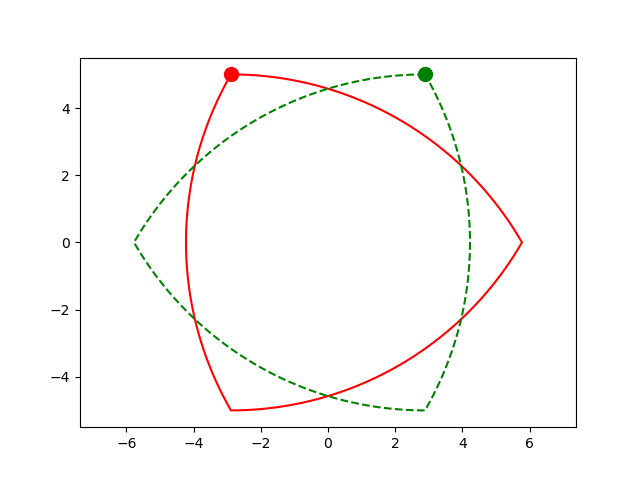

In [145]:
plt.figure()
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

Определим массив theta со значениями угла поворота при вращательном движении,
согласованный с полным оборотом центра треугольника Рело за N_frames кадров.
Напомним, что полный оборот центра треугольника на угол $2 \pi$ соответствует
вращению треугольника Рело на угол $2 \pi/3$.

In [148]:
theta = np.linspace(0, 2*np.pi/3, N_frames)

Для совмещения вращательного и поступательного движения треугольника Рело в
кадре frame сначала будем поворачивать треугольник Рело с центром в начале
координат на угол theta[frame] , затем будем перемещать треугольник Рело на
вектор center_frame[frame]

Подумайте, почему нужно делать сначала поворот, а потом перенос.

Изобразим 20-ый кадр анимации качения треугольника Рело

*Когда мы хотим переместить и повернуть объект, мы сначала поворачиваем его, а затем перемещаем, потому что поворот меняет направление объекта, но не его местоположение. Если бы мы сначала переместили объект, то при повороте он бы двигался вокруг начала координат, а не вокруг своей оси, что привело бы к неправильному результату.*

*Так что мы сначала поворачиваем объект, чтобы он смотрел в нужном направлении, а затем перемещаем его туда, куда нам нужно. Это позволяет нам сочетать вращение и перемещение.*

(-5.501735269668723, 5.536440663043177, -5.5002878716042405, 5.506045303689058)

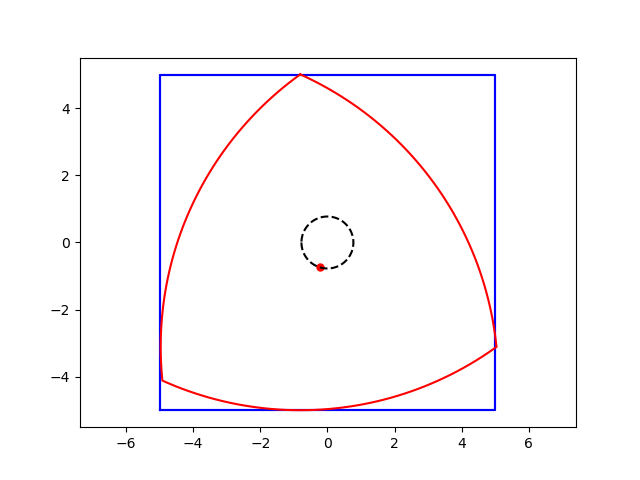

In [152]:
frame = 20
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
+ center_frame[frame])
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

$\color{red}{Измените}$ пользовательскую функцию draw_frame(r, N_frames, frame) , чтобы
создавалось изображение кадра с номером frame для анимации качения
треугольника Рело по квадрату. *Переменные из глобальной области видимости в теле
функции использовать нельзя!*

Изобразим несколько кадров анимации, расположив их в одном графическом окне по
горизонтали с использованием функции subplot .

In [155]:
def draw_frame2(r: float = 3., N_frames: int = 100, frame = 0) -> None:
    """
    аргументы:
    r - ширина треугольника,
    N_frames - количество создаваемых кадров,
    frame - номер кадра (по умолчанию 0).
    
    функция отрисовывает кадры и возвращает передвигаемый объект
    """
    assert r>0 and (isinstance(r, float) or isinstance(r, int)), 'радиус r - положительное числом типа float или int'
    assert isinstance(N_frames, int) and N_frames > 0, 'количество создаваемых кадров N_frames должно быть типа int и больше 0'
    assert isinstance(frame, int) and frame >= 0, 'номер кадра frame должен быть числом типа int и быть больше или равным нулю'
    center = np.array([0.,0.])
    n = 3
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    l = math.sqrt(r**2*2*(1-math.cos(math.pi/n)))
    R = l/(2*math.sin(math.pi/n))
    shift = [R-r/2, 0]
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    square = np.array(([-r/2,-r/2],
                   [-r/2,r/2],
                   [r/2,r/2],
                   [r/2,-r/2],
                   [-r/2,-r/2]))
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
    matrix = rotate_matrix(theta[frame])
    relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
    + center_frame[frame])
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

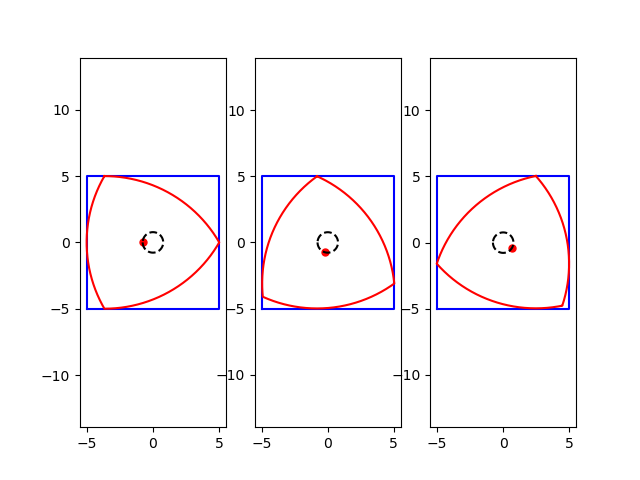

In [157]:
plt.figure()
plt.subplot(1,3,1)
draw_frame2(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame2(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame2(r=r, N_frames=N_frames, frame=40)

$\color{red}{Реализуйте \ анимацию}$ качения треугольника Рело против часовой стрелки. При
построении анимации возьмите за основу функцию draw_frame , но не используйте ее
напрямую в качестве аргумента функции FuncAnimation (модуль animation
библиотеки matplotlib )

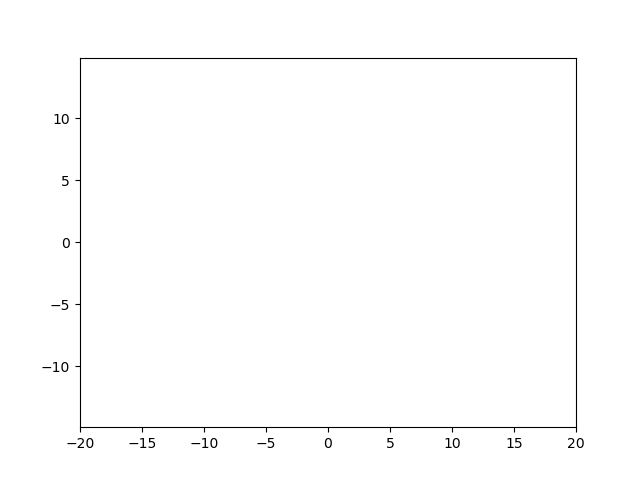

In [169]:
r = 20
def at_frame3(t) -> None:
    """
    агрументов функции является номер кадра
    
     функция отрисовывает кадры и возвращает передвигаемый объект
    """
    n = 3   # количество вершин треугольника Рело
    center = np.array([0.,0.])  # центр треугольника Рело
    #r = 20.   # ширина треугольника Рело
    N = 100   # количество точек для описания стороны треугольника Рело
    relo_matrix = relo.regular_polygon_Relo(3, r=r, center=center, N=N)
    frame = t
    l = r*math.sqrt(2*(1-math.cos(math.pi / n))) # Вычисление длины многоугольника
    R = l/(2*math.sin(math.pi/n))
    shift = [R-r/2,0]
    relo_matrix_shifted = relo_matrix - shift
    center -= shift
    N_frames = 100
    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]])
    theta = np.linspace(0, 2*np.pi/3, N_frames)
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
    + center_frame[frame])
    
    relo2.set_data(relo_matrix_changed[:,0],relo_matrix_changed[:,1])
    point2.set_data([center_frame[t,0]], [center_frame[t,1]])
    circle2.set_data(center_frame[:,0],center_frame[:,1])

fig2 = plt.figure()
ax2 = plt.axes()
plt.axis('equal')
ax2.set(xlim=(-r, r), ylim=(-r, r))

def init():
    global relo2
    global point2
    global circle2
    relo2, = ax2.plot([],[],'r-')
    point2, = ax2.plot(center_frame[0,0], center_frame[0,1], 'r.', markersize=10)
    circle2, = ax2.plot(center_frame[:,0], center_frame[:,1], 'k--')
    square = np.array(([-r/2,-r/2],[-r/2,r/2],[r/2,r/2],[r/2,-r/2],[-r/2,-r/2]))
    ax2.plot(square[:,0],square[:,1],'b-')
   
    
FuncAnimation(fig2, at_frame3, frames= 100, init_func=init, repeat = False, interval=30)

*В коде relo2, = ax2.plot([],[],'r-') `запятая` используется для `распаковки значения`, возвращаемого функцией ax2.plot().* 

In [172]:
plt.close('all')